# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

Here is your Required [Data ](https://drive.google.com/file/d/1Csmy8fz4BDM70wD07XJYKPqOr8BAPfzE/view?usp=sharing)
# **Good Luck**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from lineartree import LinearTreeRegressor
from sklearn.model_selection import cross_val_score

In [15]:
df = pd.read_excel('Concrete_Data (4).xlsx')
df.columns = ['A','B','C','D','E','F','G','H','I']

In [16]:
X = df.drop('I', axis = 1)
y = df['I']

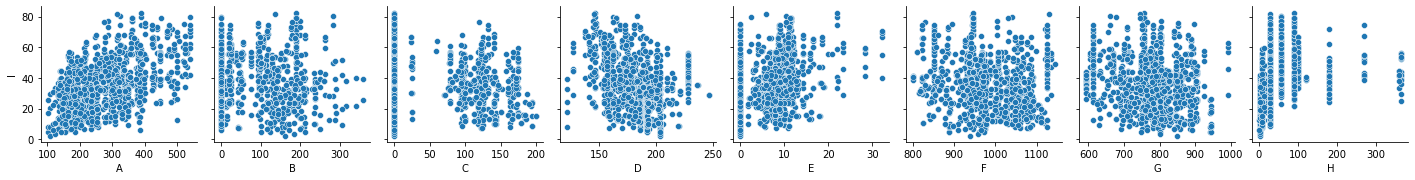

In [5]:
sns.pairplot(df, y_vars=df.columns[-1],x_vars=X.columns );

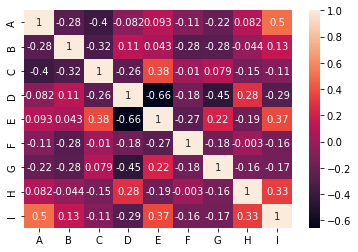

In [6]:
sns.heatmap(df.corr(), annot=True);

In [17]:
def poly(X_train, X_test,degree=5):
    poly = PolynomialFeatures(degree=degree)
    poly.fit(X_train)
    X_train_poly = poly.transform(X_train)
    X_test_poly = poly.transform(X_test)
    return X_train_poly, X_test_poly

def scaler(X_train, X_test,scaler = StandardScaler()):
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def myfunc(estimators, X_train, X_test, y_train, y_test):
    for estimator in estimators:
        estimator.fit(X_train, y_train)
        y_train_estimated = estimator.predict(X_train)
        y_test_estimated = estimator.predict(X_test)

        r2_train = r2_score(y_train, y_train_estimated)
        r2_test = r2_score(y_test, y_test_estimated)


        print(f'r2_train: {r2_train}')
        print(f'r2_test: {r2_test}')
    return r2_train, r2_test

In [18]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=2,shuffle=True)
X_train_poly, X_test_poly = poly(X_train, X_test, degree=3)
X_train_scaled, X_test_scaled = scaler(X_train, X_test)
X_train_scaled_poly, X_test_scaled_poly = poly(X_train_scaled, X_test_scaled)

In [10]:
scores = []

In [11]:
scores.append(myfunc(LinearRegression(), X_train, X_test, y_train, y_test))

r2_train: 0.623661082393512
r2_test: 0.5814505360737272


In [19]:
scores.append(myfunc(LinearRegression(), X_train_poly, X_test_poly, y_train, y_test))

r2_train: 0.9334257235987939
r2_test: 0.8178019042911453


In [20]:
scores.append(myfunc(Ridge(), X_train_poly, X_test_poly, y_train, y_test))

r2_train: 0.9306827587744209
r2_test: 0.8345195144793331


C:\Users\Mahmoud\anaconda3\envs\fwd\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.20148e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [14]:
scores.append(myfunc(Ridge(), X_train_scaled_poly, X_test_scaled_poly, y_train, y_test))

r2_train: 0.9834799543369995
r2_test: -1.4323973123654792


# mahmoud

In [12]:
alphas = [1e-15, 1e-12, 1e-9, 1e-6, 0.001, 0.01, 0.1, 0, 1, 3, 5, 10, 20]
for alpha in alphas:
    scores.append(myfunc(Ridge(), X_train_scaled_poly, X_test_scaled_poly, y_train, y_test))

r2_train: 0.9834799543369995
r2_test: -1.4323973123654792


In [13]:
scores.append(myfunc(Lasso(), X_train_poly, X_test_poly, y_train, y_test))

r2_train: 0.9423711419695487
r2_test: 0.8460389230966907


C:\Users\Mahmoud\anaconda3\envs\fwd\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6441.088838018083, tolerance: 22.017496663679943
  model = cd_fast.enet_coordinate_descent(


In [14]:
scores.append(myfunc(Lasso(), X_train_scaled_poly, X_test_scaled_poly, y_train, y_test))

r2_train: 0.7539438867996919
r2_test: 0.6283428266258586


C:\Users\Mahmoud\anaconda3\envs\fwd\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2111.9970614401827, tolerance: 22.017496663679943
  model = cd_fast.enet_coordinate_descent(


In [16]:
# alphas = [1e-15, 1e-12, 1e-9, 1e-6, 0.001, 0.01, 0.1, 0, 1, 3, 5, 10, 20]
alphas = np.arange(100,1000,100)
r2_score_list = []
for alpha in alphas:
    print(f'alpha: {alpha}')
    r2_score_list.append(myfunc(Lasso(alpha = alpha), X_train_poly, X_test_poly, y_train, y_test))
    print('.........')

alpha: 100


C:\Users\Mahmoud\anaconda3\envs\fwd\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6507.411820259227, tolerance: 22.017496663679943
  model = cd_fast.enet_coordinate_descent(


r2_train: 0.942055956030342
r2_test: 0.8458682352009256
.........
alpha: 200


C:\Users\Mahmoud\anaconda3\envs\fwd\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6537.105290726534, tolerance: 22.017496663679943
  model = cd_fast.enet_coordinate_descent(


r2_train: 0.9419125162325356
r2_test: 0.8464524309942539
.........
alpha: 300


C:\Users\Mahmoud\anaconda3\envs\fwd\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6544.921343257969, tolerance: 22.017496663679943
  model = cd_fast.enet_coordinate_descent(


r2_train: 0.94181536908428
r2_test: 0.8464907968865876
.........
alpha: 400


C:\Users\Mahmoud\anaconda3\envs\fwd\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6560.713258825611, tolerance: 22.017496663679943
  model = cd_fast.enet_coordinate_descent(


r2_train: 0.9418043325462998
r2_test: 0.8468319055033349
.........
alpha: 500


C:\Users\Mahmoud\anaconda3\envs\fwd\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6567.08328865345, tolerance: 22.017496663679943
  model = cd_fast.enet_coordinate_descent(


r2_train: 0.9417728702904855
r2_test: 0.8467096482972993
.........
alpha: 600


C:\Users\Mahmoud\anaconda3\envs\fwd\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6567.537816057381, tolerance: 22.017496663679943
  model = cd_fast.enet_coordinate_descent(


r2_train: 0.9417328034064397
r2_test: 0.8463492669113314
.........
alpha: 700


C:\Users\Mahmoud\anaconda3\envs\fwd\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6571.213684719086, tolerance: 22.017496663679943
  model = cd_fast.enet_coordinate_descent(


r2_train: 0.9416790666622736
r2_test: 0.8456832640710198
.........
alpha: 800


C:\Users\Mahmoud\anaconda3\envs\fwd\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6567.335136218325, tolerance: 22.017496663679943
  model = cd_fast.enet_coordinate_descent(


r2_train: 0.9416309513706671
r2_test: 0.8453070760555113
.........
alpha: 900
r2_train: 0.9415864153747495
r2_test: 0.8449984464646907
.........


C:\Users\Mahmoud\anaconda3\envs\fwd\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6555.825737533284, tolerance: 22.017496663679943
  model = cd_fast.enet_coordinate_descent(


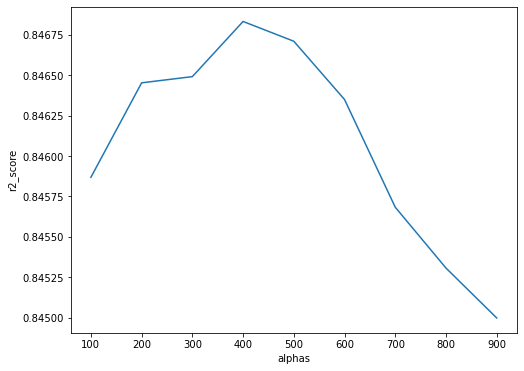

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(alphas, r2_score_list)

plt.xlabel('alphas')
plt.ylabel('r2_score');

In [18]:
myfunc(LinearTreeRegressor(base_estimator=LinearRegression(), min_samples_leaf=50), X_train, X_test, y_train, y_test);

r2_train: 0.9310810952735096
r2_test: 0.9000167854220771


In [19]:
N_leafs = range(10,100,5)
r2_score_test_ls = []
for N in N_leafs:
    r2_score_test_ls.append(myfunc(LinearTreeRegressor(base_estimator=LinearRegression(), min_samples_leaf=N), X_train, X_test, y_train, y_test))

r2_train: 0.963468325132835
r2_test: -648.1345314151614
r2_train: 0.9570480992485051
r2_test: 0.8683907036020716
r2_train: 0.9525588981305909
r2_test: 0.8663163129392433
r2_train: 0.9446182590383728
r2_test: 0.8760896093127067
r2_train: 0.9397871433438097
r2_test: 0.8828953167975295
r2_train: 0.9395479453310299
r2_test: 0.8847188121219051
r2_train: 0.9394193744843823
r2_test: 0.8847885774646005
r2_train: 0.9367556566858579
r2_test: 0.8841377270912788
r2_train: 0.9310810952735096
r2_test: 0.9000167854220771
r2_train: 0.9231098949400283
r2_test: 0.8901430182469586
r2_train: 0.919409734812458
r2_test: 0.8727711238342549
r2_train: 0.9158930090907985
r2_test: 0.8727552236987756
r2_train: 0.9033467477177832
r2_test: 0.8919230686555304
r2_train: 0.8973929178063004
r2_test: 0.8851001767317355
r2_train: 0.8973929178063004
r2_test: 0.8851001767317355
r2_train: 0.8910567867598086
r2_test: 0.8689979718833309
r2_train: 0.8900510836073859
r2_test: 0.8687579392299719
r2_train: 0.8879684447325422
r2_t

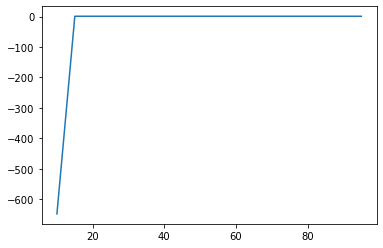

In [20]:
plt.plot(N_leafs, r2_score_test_ls);

In [21]:
max(r2_score_test_ls)

0.9000167854220771

In [22]:
r2_score_test_ls.index(0.9000167854220771)

8

In [25]:
cross_val_score(LinearTreeRegressor(base_estimator=LinearRegression(), min_samples_leaf=50), X, y, cv=5)

array([ 0.23446373,  0.66561075,  0.71170573,  0.60217693, -0.48371967])

In [26]:
R2_test_li = []

for train_index, test_index in KFold(shuffle=True, random_state=20).split(X):
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
    R2_test_li.append(myfunc(LinearTreeRegressor(base_estimator=LinearRegression(), min_samples_leaf=50), X_train_cv, X_test_cv, y_train_cv, y_test_cv))

    print('------------------')

r2_train: 0.9357886084871501
r2_test: 0.8832424737930833
------------------
r2_train: 0.9305900734181838
r2_test: 0.8855734494887302
------------------
r2_train: 0.9265196769539494
r2_test: 0.8813034747251324
------------------
r2_train: 0.9325583507111435
r2_test: 0.9017867890504428
------------------
r2_train: 0.9296633637686567
r2_test: 0.8781167266152036
------------------


In [27]:
np.mean(R2_test_li)

0.8860045827345184

https://github.com/cerlymarco/linear-tree

alphas = [1e-15, 1e-12, 1e-9, 1e-6, 0.001, 0.01, 0.1, 0, 1, 3, 5, 10, 20]
kfold = KFold()

#print(f'alpha: {alpha}')
li = []
for j, alpha in enumerate(alphas):
    print(f'        alpha: {alpha}\n')
    R2_train_li = []
    R2_test_li  = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test, y_train, y_test = X_poly[train_index], X_poly[test_index], y[train_index], y[test_index]

        ridge = Ridge(alpha = alpha, normalize=True)
        ridge.fit(X_train, y_train)
        y_train_ridge = ridge.predict(X_train)
        y_test_ridge = ridge.predict(X_test)

        R2_train = r2_score(y_train, y_train_ridge)
        R2_test = r2_score(y_test, y_test_ridge)
        R2_train_li.append(R2_train)
        R2_test_li.append(R2_test)

#         name =f"split{i}_test_score" 
#         n = np.round(ER_test, decimals=5)
#         #print(i,j, n)
        
#         mydf[name][j] = mycast(ER_test)
        
        print(f'R2_train: {R2_train}')
        print(f'R2_test: {R2_test}')
        print('------------------')

    print('------------------')
    print(f'R2_train_avg: {np.mean(R2_train_li)}')
    print(f'R2_test_avg: {np.mean(R2_test_li)}')
    print('------------------')
    print('------------------')
    print('-------------------------------------------------------')
    li.append({'R2_train_avg': np.mean(R2_train_li), 'R2_test_avg': np.mean(R2_test_li)});

result = pd.DataFrame(li, index=alphas)